# Support Vector Machine

SVM without kernels.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sys
sys.path.append("./util/plot")
from util.plot import plot_fn_2d

In [2]:
center1 = np.random.uniform(low=0, high=300, size=(1, 2))
center2 = np.random.uniform(low=0, high=300, size=(1, 2))

n = 50

type1 = center1 + np.random.uniform(low=-80, high=80, size=(n, 2))
type2 = center2 + np.random.uniform(low=-80, high=80, size=(n, 2))

type1_label = np.hstack((type1, np.full((n, 1), -1)))
type2_label = np.hstack((type2, np.full((n, 1), 1)))

data = np.vstack((type1_label, type2_label))
np.random.shuffle(data)

data[:10]

array([[102.11668972, 177.48873079,  -1.        ],
       [125.81607142, 212.64187493,  -1.        ],
       [174.41875355, 232.68073753,  -1.        ],
       [165.2007837 , 163.09504572,   1.        ],
       [ 45.5614521 , 189.1399523 ,  -1.        ],
       [160.86651552, 246.0578331 ,   1.        ],
       [229.25364312, 171.25288741,   1.        ],
       [198.57720129, 256.18595912,   1.        ],
       [276.54979856, 218.94461466,   1.        ],
       [ 66.61239442, 287.30471639,  -1.        ]])

* Large value of parameter C implies: Small margin.
* Small value of parameter C implies: Large margin.

For very tiny values of C, you should get misclassified examples.

In [3]:
def err(w, b, x, yn):
  e = yn * (np.dot(w, x) + b)
  return max(0, 1 - e)

def f(arg):
  w = arg[0:2]
  b = arg[2]
  c = 2
  w_norm = np.linalg.norm(w)
  regularizer = 0.5 * w_norm * w_norm
  error = 0
  for [x0, x1, label] in data:
    error += err(w, b, [x0, x1], label)

  return regularizer + (c * error)

In [4]:
result = optimize.minimize(f, x0=[0, 0, 0])
result.x

w = result.x[0:2]
b = result.x[2]

In [5]:
def eval(x):
  return np.dot(w, x) + b

In [6]:
plane_point = np.array(optimize.minimize(lambda x: abs(eval(x)), x0=[0, 0]).x)

def separating_plane(t):
  w_rot = np.array([-w[1], w[0]])
  return plane_point + t * w_rot

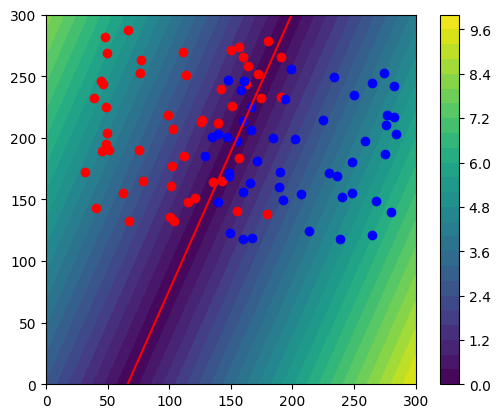

In [7]:
_, ax = plt.subplots()

ax.set_box_aspect(1)

plt.xlim(0, 300)
plt.ylim(0, 300)

plot_fn_2d(lambda x: abs(eval(x)), x_lo=0, x_hi=300, y_lo=0, y_hi=300)
plt.scatter(type1[:, 0], type1[:, 1], color='red')
plt.scatter(type2[:, 0], type2[:, 1], color='blue')

plane_points = []

for i in np.linspace(-100000, 100000, 100):
  plane_points.append(separating_plane(i))

plane_points = np.array(plane_points)
plt.plot(plane_points[:, 0], plane_points[:, 1], color='red')